DE MENEZES LIMA, Marina

**Toy examples**

In this part of the practical session, you will play with some toy data to better understand the classification algorithms seen this morning.

Please answer all questions 

**Deadline**: Upload this notebook, the one about Emotion Recognition and the answers to the theoretical questions to E-Campus. Please verify the exact deadline on E-Campus.

Let's first load the needed packages.

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # for plots
from matplotlib.colors import ListedColormap
from matplotlib import rc

import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import time

%matplotlib inline
np.random.seed(seed=666)

Here, we define some functions useful for generating and plotting the data

In [28]:
def gaussian_data_generation(n, mean, cov, noise_std):
   # create data which follows a multivariate Gaussian distribution
   # a white (Gaussian) noise is then added to the data
    
    assert cov.shape[0] == cov.shape[1], "Please use only square covariance matrix"    
    assert len(mean) == cov.shape[0], "the dimension of the mean should be equal to the dimension of the covariance matrix"
    
    X = np.random.multivariate_normal(mean, cov, n) # actual data
    X = X + np.random.multivariate_normal(np.zeros(len(mean)), noise_std ** 2 *np.eye(len(mean)), n)  # we add white noise to the data     
   
    return X

def frontiere(f, X, y, step=50):
    # decision boundary of classifier f
    # construct cmap

    min_tot = np.min(X)
    max_tot = np.max(X)
    delta = (max_tot - min_tot) / step
    xx, yy = np.meshgrid(np.arange(min_tot, max_tot, delta),
                         np.arange(min_tot, max_tot, delta))
    z = np.array([f(vec) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    labels = np.unique(z)
    color_blind_list = sns.color_palette("colorblind", labels.shape[0])
    sns.set_palette(color_blind_list)
    my_cmap = ListedColormap(color_blind_list)
    plt.imshow(z, origin='lower', extent=[min_tot, max_tot, min_tot, max_tot],
               interpolation="mitchell", alpha=0.80, cmap=my_cmap)

    ax = plt.gca()
    cbar = plt.colorbar(ticks=labels)
    cbar.ax.set_yticklabels(labels)

    k = np.unique(y).shape[0]
    color_blind_list = sns.color_palette("colorblind", k)
    for i, label in enumerate(y):
        plt.scatter(X[i, 0], X[i, 1], c=[color_blind_list[int(y[i])]],
                    s=80, marker=symlist[int(label)])
    plt.ylim([min_tot, max_tot])
    plt.xlim([min_tot, max_tot])
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    
def class_int_round(z, n_class):
    # rounding needed to go from real to integer values 
    output = np.round(z).astype(int)
    if isinstance(z, np.ndarray):
        j = z < 0
        output[j] = 0
        k = z > n_class - 1
        output[k] = n_class - 1
    else:
        if output < 0:
            output = 0
        else:
            if output > n_class - 1:
                output = n_class - 1
    return output

The next function is the one you will use to create the toy data. You can choose among three scenarios: 2, 3 or 4 classes. Each class is composed of 2D points sampled from a multivariate Gaussian distribution. You can choose the number of samples, average and covariance matrix for each class. 

In [29]:
def generate_scenario(n_classes=3):
    
    if n_classes == 2:
        # Example with 2 classes
        n_0=80
        mean_0 = [0, 0]        
        cov_0 = np.array([[1, 0.1], [0.1, 0.9]])
        X_0=gaussian_data_generation(n_0, mean_0, cov_0, 0.1)
        y_0=np.zeros(n_0)
        
        n_1=80
        mean_1 = [3, 2]
        cov_1 = np.array([[0.1, 0], [0, 0.5]])
        X_1=gaussian_data_generation(n_1, mean_1, cov_1, 0.1)
        y_1=np.ones(n_1)
        
        X=np.concatenate((X_0,X_1))
        y=np.concatenate((y_0,y_1))
        
    elif n_classes == 3:
        # Example with 3 classes
        n_0=80
        mean_0 = [0, 0]        
        cov_0 = np.array([[1, 0.1], [0.1, 0.9]])
        X_0=gaussian_data_generation(n_0, mean_0, cov_0, 0.1)
        y_0=np.zeros(n_0)
        
        n_1=80
        mean_1 = [2, 2]
        cov_1 = np.array([[0.1, 0], [0, 0.5]])
        X_1=gaussian_data_generation(n_1, mean_1, cov_1, 0.1)
        y_1=np.ones(n_1)
        
        n_2=80
        mean_2 = [3, 3]
        cov_2 = np.array([[0.5, 0.1], [0.1, 1]])
        X_2=gaussian_data_generation(n_2, mean_2, cov_2, 0.1)
        y_2=2*np.ones(n_2)
        
        X=np.concatenate((X_0,X_1,X_2))
        y=np.concatenate((y_0,y_1,y_2))
    elif n_classes == 4:
        # Example with 4 classes
        n_0=80
        mean_0 = [0, 0]        
        cov_0 = np.array([[1, 0.1], [0.1, 0.9]])
        X_0=gaussian_data_generation(n_0, mean_0, cov_0, 0.1)
        y_0=np.zeros(n_0)
        
        n_1=80
        mean_1 = [3, 3]
        cov_1 = np.array([[0.1, 0], [0, 0.5]])
        X_1=gaussian_data_generation(n_1, mean_1, cov_1, 0.1)
        y_1=np.ones(n_1)
        
        n_2=80
        mean_2 = [0, 3]
        cov_2 = np.array([[0.5, 0.1], [0.1, 1]])
        X_2=gaussian_data_generation(n_2, mean_2, cov_2, 0.1)
        y_2=2*np.ones(n_2)
        
        n_3=80
        mean_3 = [3, 0]
        cov_3 = np.array([[0.9, 0.15], [0.15, 0.8]])
        X_3=gaussian_data_generation(n_3, mean_3, cov_3, 0.1)
        y_3=3*np.ones(n_3)
        
        X=np.concatenate((X_0,X_1,X_2,X_3))
        y=np.concatenate((y_0,y_1,y_2,y_3))  

    return X, y

Let's choose a scenario and generate some data

In [30]:
######## PARAMETER TO CHOOSE THE SCENARIO (number of classes) #######
n_classes=4
#####################################################################

X, y = generate_scenario(n_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's plot the data

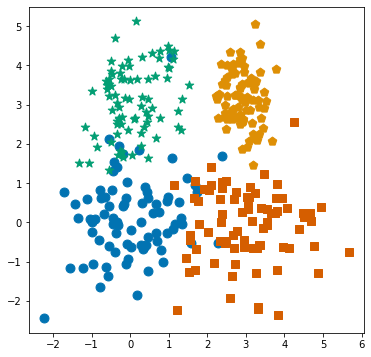

In [31]:
fig1 = plt.figure(figsize=(6, 6))
ax = plt.gca()
min_tot = np.min(X)
max_tot = np.max(X)
symlist = ['o', 'p', '*', 's', '+', 'x', 'D', 'v', '-', '^']
k = np.unique(y).shape[0]
color_blind_list = sns.color_palette("colorblind", k)
for i, label in enumerate(y):
    plt.scatter(X[i, 0], X[i, 1], c=[color_blind_list[int(y[i])]],
                s=80, marker=symlist[int(label)])
#ax.get_yaxis().set_ticks([])
#ax.get_xaxis().set_ticks([])

As first classifier, we can use a simple linear regression where we  transform in integers the predictions.

 **Question**: look at the function 'class_int_round'. Explain what it does.

**Answer**: The function 'class_int_round' will transform the real values given by the linear regression problem to discrete values, as if they were the result to a classification problem. It does that by rounding the value to the closest integer (that represents a class). In the case where the value is bigger than the number of classes, the class (number of classes - 1) will be assigned, while if the value is smaller than 0, the class 0 will be assigned.


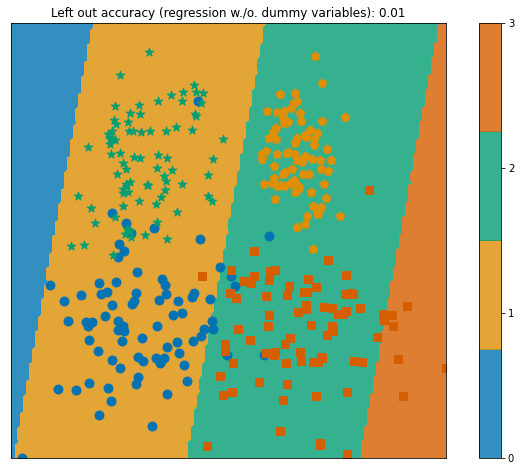

In [32]:
##############################################################################
# Naive linear regression on raw observations
##############################################################################

resolution_param = 150  # 500 for nice plotting, 50 for fast version
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred_test = class_int_round(regr.predict(X_test), n_classes)

# Plotting part
fig0 = plt.figure(figsize=(12, 8))
title = "Left out accuracy (regression w./o. dummy variables)" + \
        ": {:.2f}".format(accuracy_score(y_test, y_pred_test))
plt.title(title)

def f(xx):
    """Classifier"""
    return class_int_round(regr.predict(xx.reshape(1, -1)), n_classes)
frontiere(f, X, y, step=resolution_param)

plt.show()

Instead of using this simple strategy, we can also use a *OneHotEncoder*.

**Question**: Do you see any difference in the resulting decision boundaries ? Which is the best strategy in your opinion ? Why ?

**Answer**: The resulting decision boundaries are clearly different for both cases.

For the case 2, the results are similar. Considering the case 3, in the first approach we have that the classes are approximately the same size and the 'distance' between classes 0 and 2 are bigger than the one between 0 and 1 or 1 and 2, while the OneHotEncoder gives another division where the sizes and distances between classes are different. In this case, the first aproach gives a higger accuracy. Lastly, the 'class_int_round' approach does not work int he case 4 while the OneHotEncoder is able to give good results.

Overall, the OneHotEncoder seems to be a better approach, especially in cases where the classes are not clearly and equally separated (most cases).

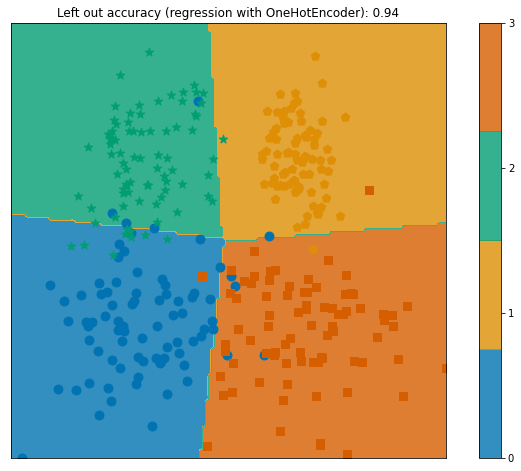

In [33]:
##############################################################################
# Naive linear regression on dummy variables (OneHotEncoder)
##############################################################################
resolution_param = 150  
enc = OneHotEncoder(categories='auto')
enc.fit(y_train.reshape(-1, 1))
Y = enc.transform(y_train.reshape(-1, 1)).toarray()
regr_multi = LinearRegression()
regr_multi.fit(X_train, Y)
proba_vector_test = regr_multi.predict(X_test)
y_pred_test = class_int_round(regr.predict(X_test), n_classes)

# performance evaluation on new dataset
y_pred_test = np.argmax(proba_vector_test, axis=1)
title = "Left out accuracy (regression with OneHotEncoder)" + \
        ": {:.2f}".format(accuracy_score(y_test, y_pred_test))

# Plotting part
fig1 = plt.figure(figsize=(12, 8))
plt.title(title)


def f(xx):
    """Classifier"""
    return np.argmax(regr_multi.predict(xx.reshape(1, -1)))
frontiere(f, X, y, step=resolution_param)

plt.show()

Let's use the other strategies seen this morning.

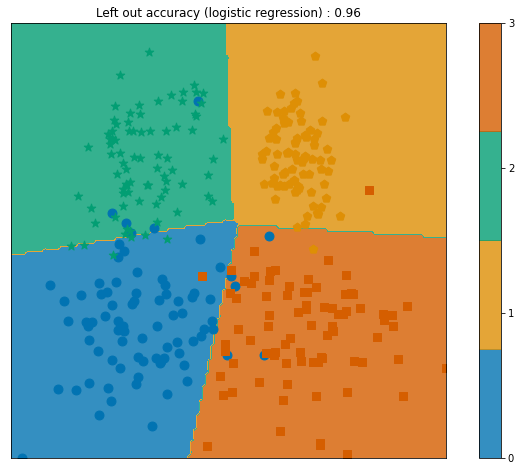

In [34]:
##############################################################################
# Logistic regression
##############################################################################
resolution_param = 150  
clf = LogisticRegression(solver='lbfgs',multi_class='ovr') # you can also try multi_class='multinomial', 
clf.fit(X_train, y_train)
y_logit_test = clf.predict(X_test)
title = "Left out accuracy (logistic regression) " + \
        ": {:.2f}".format(accuracy_score(y_test, y_logit_test))
fig2 = plt.figure(figsize=(12, 8))
plt.title(title)


def f(xx):
    """Classifier"""
    return int(clf.predict(xx.reshape(1, -1)))
frontiere(f, X, y, step=resolution_param)

plt.show()

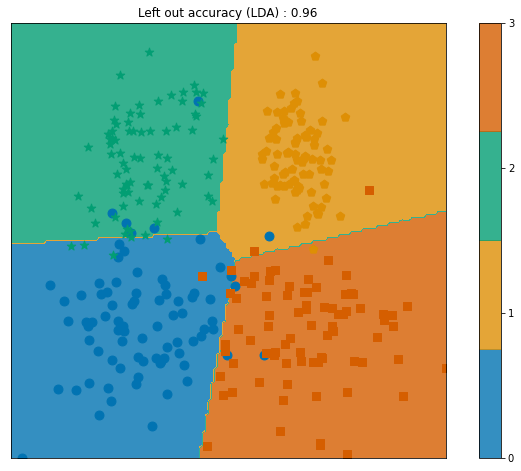

In [35]:
##############################################################################
# LDA
##############################################################################
resolution_param = 150  
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train, y_train)
y_LDA_test = clf_LDA.predict(X_test)

title = "Left out accuracy (LDA) " + \
        ": {:.2f}".format(accuracy_score(y_test, y_LDA_test))
fig2 = plt.figure(figsize=(12, 8))
plt.title(title)


def f(xx):
    """Classifier"""
    return int(clf_LDA.predict(xx.reshape(1, -1)))
frontiere(f, X, y, step=resolution_param)

plt.show()

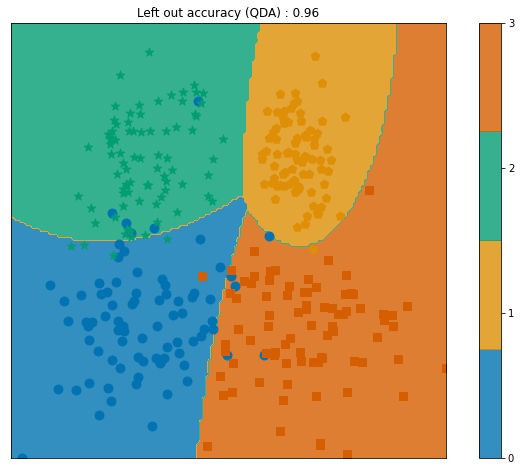

In [36]:
##############################################################################
# QDA
##############################################################################
resolution_param = 150 
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train, y_train)
y_QDA_test = clf_QDA.predict(X_test)
title = "Left out accuracy (QDA) " + \
        ": {:.2f}".format(accuracy_score(y_test, y_QDA_test))
fig2 = plt.figure(figsize=(12, 8))
plt.title(title)


def f(xx):
    """Classifier"""
    return int(clf_QDA.predict(xx.reshape(1, -1)))
frontiere(f, X, y, step=resolution_param)

plt.show()

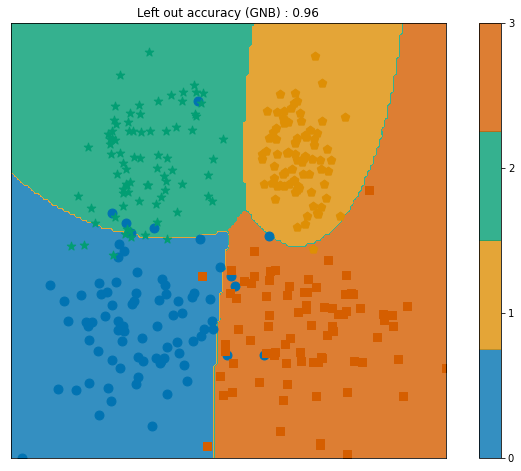

In [37]:
##############################################################################
# Naive Bayes 
##############################################################################
resolution_param = 150  
clf_GNB = GaussianNB()
clf_GNB.fit(X_train, y_train)

y_test_GNB = clf_GNB.predict(X_test)

title = "Left out accuracy (GNB) " + \
        ": {:.2f}".format(accuracy_score(y_test, y_test_GNB))
fig2 = plt.figure(figsize=(12, 8))
plt.title(title)


def f(xx):
    """Classifier"""
    return int(clf_GNB.predict(xx.reshape(1, -1)))
frontiere(f, X, y, step=resolution_param)

plt.show()

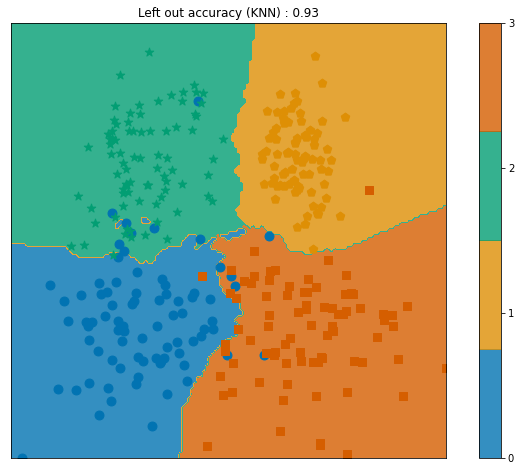

In [38]:
##############################################################################
# KNN
##############################################################################
resolution_param = 150  
clf_KNN = KNeighborsClassifier()
clf_KNN.n_neighbors=5

clf_KNN.fit(X_train, y_train)
y_KNN_test = clf_KNN.predict(X_test)

title = "Left out accuracy (KNN) " + \
        ": {:.2f}".format(accuracy_score(y_test, y_KNN_test))
fig2 = plt.figure(figsize=(12, 8))
plt.title(title)

def f(xx):
    """Classifier"""
    return int(clf_KNN.predict(xx.reshape(1, -1)))
frontiere(f, X, y, step=resolution_param)

plt.show()

**Questions**:


*   Describe the decision boundaries of the methods. Are all linear ?
The methods Logistic Regression and LDA return linear boundaries while QDA, GNB and KNN do not. The last one is definitively the most irregular and presents discontinuities for the case 3. 

*   Using the following code, compare the computational time and the test accuracy of the different methods in the three scenarios. Comment the results.




*Case 2:*

In [13]:
time_start = time.perf_counter()
clf.fit(X_train, y_train)
y_logit_test = clf.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy logistic regression', "%.2f" %accuracy_score(y_test, y_logit_test))

time_start = time.perf_counter()
clf_LDA.fit(X_train, y_train)
y_LDA_test = clf_LDA.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy LDA', "%.2f" %accuracy_score(y_test, y_LDA_test))

time_start = time.perf_counter()
clf_QDA.fit(X_train, y_train)
y_QDA_test = clf_QDA.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy QDA', "%.2f" %accuracy_score(y_test, y_QDA_test))

time_start = time.perf_counter()
clf_GNB.fit(X_train, y_train)
y_test_GNB = clf_GNB.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy GNB', "%.2f" %accuracy_score(y_test, y_test_GNB))

time_start = time.perf_counter()
clf_KNN.fit(X_train, y_train)
y_KNN_test = clf_KNN.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy KNN', "%.2f" %accuracy_score(y_test, y_KNN_test))

Computational time: 0.0071 s ; Test accuracy logistic regression 0.97
Computational time: 0.0020 s ; Test accuracy LDA 0.90
Computational time: 0.0014 s ; Test accuracy QDA 1.00
Computational time: 0.0038 s ; Test accuracy GNB 1.00
Computational time: 0.0142 s ; Test accuracy KNN 0.97


*Case 3:*

In [26]:
time_start = time.perf_counter()
clf.fit(X_train, y_train)
y_logit_test = clf.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy logistic regression', "%.2f" %accuracy_score(y_test, y_logit_test))

time_start = time.perf_counter()
clf_LDA.fit(X_train, y_train)
y_LDA_test = clf_LDA.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy LDA', "%.2f" %accuracy_score(y_test, y_LDA_test))

time_start = time.perf_counter()
clf_QDA.fit(X_train, y_train)
y_QDA_test = clf_QDA.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy QDA', "%.2f" %accuracy_score(y_test, y_QDA_test))

time_start = time.perf_counter()
clf_GNB.fit(X_train, y_train)
y_test_GNB = clf_GNB.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy GNB', "%.2f" %accuracy_score(y_test, y_test_GNB))

time_start = time.perf_counter()
clf_KNN.fit(X_train, y_train)
y_KNN_test = clf_KNN.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy KNN', "%.2f" %accuracy_score(y_test, y_KNN_test))

Computational time: 0.0108 s ; Test accuracy logistic regression 0.85
Computational time: 0.0016 s ; Test accuracy LDA 0.78
Computational time: 0.0011 s ; Test accuracy QDA 0.83
Computational time: 0.0016 s ; Test accuracy GNB 0.85
Computational time: 0.0065 s ; Test accuracy KNN 0.82


*Case 4:*

In [39]:
time_start = time.perf_counter()
clf.fit(X_train, y_train)
y_logit_test = clf.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy logistic regression', "%.2f" %accuracy_score(y_test, y_logit_test))

time_start = time.perf_counter()
clf_LDA.fit(X_train, y_train)
y_LDA_test = clf_LDA.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy LDA', "%.2f" %accuracy_score(y_test, y_LDA_test))

time_start = time.perf_counter()
clf_QDA.fit(X_train, y_train)
y_QDA_test = clf_QDA.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy QDA', "%.2f" %accuracy_score(y_test, y_QDA_test))

time_start = time.perf_counter()
clf_GNB.fit(X_train, y_train)
y_test_GNB = clf_GNB.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy GNB', "%.2f" %accuracy_score(y_test, y_test_GNB))

time_start = time.perf_counter()
clf_KNN.fit(X_train, y_train)
y_KNN_test = clf_KNN.predict(X_test)
time_elapsed = (time.perf_counter() - time_start)
print('Computational time:', "%.4f" %time_elapsed, 's ; Test accuracy KNN', "%.2f" %accuracy_score(y_test, y_KNN_test))

Computational time: 0.0129 s ; Test accuracy logistic regression 0.96
Computational time: 0.0020 s ; Test accuracy LDA 0.96
Computational time: 0.0025 s ; Test accuracy QDA 0.96
Computational time: 0.0038 s ; Test accuracy GNB 0.96
Computational time: 0.0067 s ; Test accuracy KNN 0.93


From the code, we can see that even though the results can be very similar, the GBN seems to have an overall better performance,considering both time and result accuracy. The logistic regression has the longest times, not being the best option for cases where time is an important feature.
